In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None
df = pd.read_csv('/content/sample_data/chemicals-in-cosmetics.csv')
print('The original database shape:', df.shape, '\n', df.dtypes) 
df.head()

# отбор числовых колонок
df_numeric = df.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values
print('Numeric cols:',numeric_cols)

# отбор нечисловых колонок
df_non_numeric = df.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values
print('Non numeric cols:',non_numeric_cols)

The original database shape: (112870, 22) 
 CDPHId                      int64
ProductName                object
CSFId                     float64
CSF                        object
CompanyId                   int64
CompanyName                object
BrandName                  object
PrimaryCategoryId           int64
PrimaryCategory            object
SubCategoryId               int64
SubCategory                object
CasId                       int64
CasNumber                  object
ChemicalId                  int64
ChemicalName               object
InitialDateReported        object
MostRecentDateReported     object
DiscontinuedDate           object
ChemicalCreatedAt          object
ChemicalUpdatedAt          object
ChemicalDateRemoved        object
ChemicalCount               int64
dtype: object
Numeric cols: ['CDPHId' 'CSFId' 'CompanyId' 'PrimaryCategoryId' 'SubCategoryId' 'CasId'
 'ChemicalId' 'ChemicalCount']
Non numeric cols: ['ProductName' 'CSF' 'CompanyName' 'BrandName' 'PrimaryCa

In [ ]:
df_before = pd.read_csv('/content/sample_data/chemicals-in-cosmetics.csv') 
df_before.head()

,CDPHId,ProductName,CSFId,CSF,CompanyId,CompanyName,BrandName,PrimaryCategoryId,PrimaryCategory,SubCategoryId,...,CasNumber,ChemicalId,ChemicalName,InitialDateReported,MostRecentDateReported,DiscontinuedDate,ChemicalCreatedAt,ChemicalUpdatedAt,ChemicalDateRemoved,ChemicalCount
0,2,ULTRA COLOR RICH EXTRA PLUMP LIPSTICK-ALL SHADES,NaN,NaN,4,New Avon LLC,AVON,44,Makeup Products (non-permanent),53,...,13463-67-7,6,Titanium dioxide,06/17/2009,08/28/2013,02/01/2011,07/09/2009,07/09/2009,NaN,1
1,3,Glover's Medicated Shampoo,NaN,NaN,338,J. Strickland & Co.,Glover's,18,Hair Care Products (non-coloring),25,...,65996-92-1,4,Distillates (coal tar),07/01/2009,07/01/2009,NaN,07/01/2009,07/01/2009,NaN,2
2,3,Glover's Medicated Shampoo,NaN,NaN,338,J. Strickland & Co.,Glover's,18,Hair Care Products (non-coloring),25,...,140-67-0,5,Estragole,07/01/2009,07/01/2009,NaN,07/02/2009,07/02/2009,NaN,2
3,4,PRECISION GLIMMER EYE LINER-ALL SHADES �,NaN,NaN,4,New Avon LLC,AVON,44,Makeup Products (non-permanent),46,...,13463-67-7,7,Titanium dioxide,07/09/2009,08/28/2013,NaN,07/09/2009,07/09/2009,NaN,1
4,5,AVON BRILLIANT SHINE LIP GLOSS-ALL SHADES �,NaN,NaN,4,New Avon LLC,AVON,44,Makeup Products (non-permanent),52,...,13463-67-7,8,Titanium dioxide,07/09/2009,08/28/2013,02/01/2011,07/09/2009,07/09/2009,NaN,1


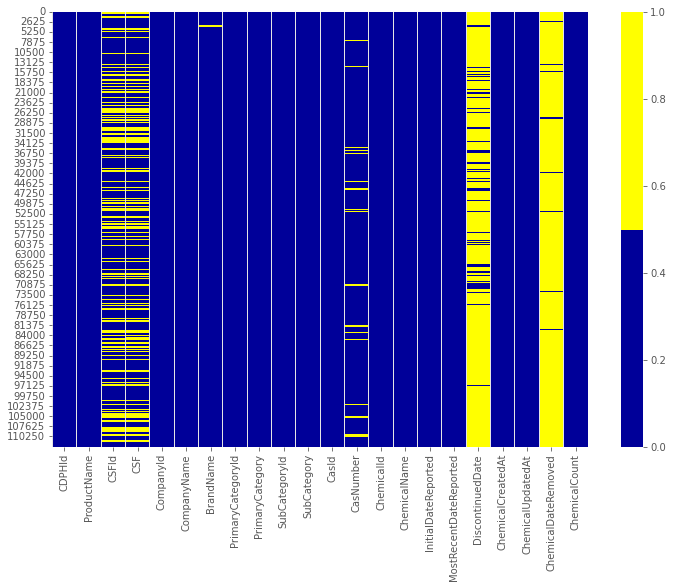

In [ ]:
cols = df.columns[:22] 
# желтый - пропущенные данные, синий - не пропущенные
colours = ['#000099', '#ffff00'] 
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colours))

Из тепловой диаграммы видно, что больше всего пропущены два признака - DiscountedDate и ChemicalDateRemoved, еще два признака - CSFId и CSF - можно заменить на медианные или наиболее встречающиеся значения.

In [ ]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

CDPHId - 0%
ProductName - 0%
CSFId - 30%
CSF - 30%
CompanyId - 0%
CompanyName - 0%
BrandName - 0%
PrimaryCategoryId - 0%
PrimaryCategory - 0%
SubCategoryId - 0%
SubCategory - 0%
CasId - 0%
CasNumber - 6%
ChemicalId - 0%
ChemicalName - 0%
InitialDateReported - 0%
MostRecentDateReported - 0%
DiscontinuedDate - 89%
ChemicalCreatedAt - 0%
ChemicalUpdatedAt - 0%
ChemicalDateRemoved - 97%
ChemicalCount - 0%


В процентном соотношении данные представлены более наглядно.

created missing indicator for: CSFId
created missing indicator for: CSF
created missing indicator for: BrandName
created missing indicator for: CasNumber
created missing indicator for: DiscontinuedDate
created missing indicator for: ChemicalDateRemoved


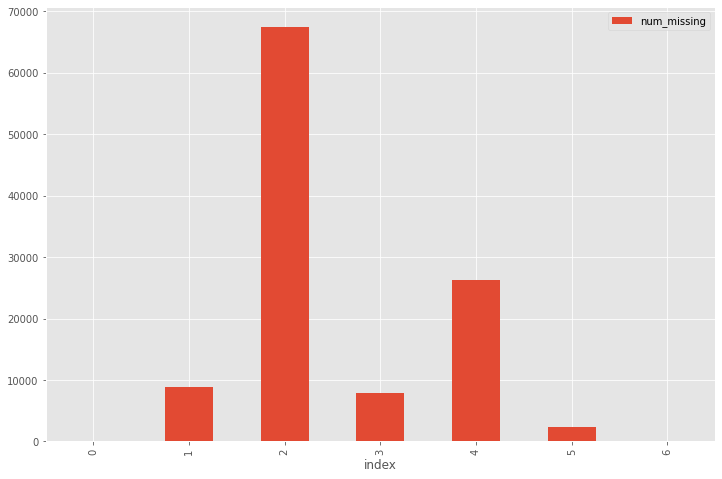

In [ ]:
for col in df.columns:
    missing = df[col].isnull()
    num_missing = np.sum(missing)
    
    if num_missing > 0:  
        print('created missing indicator for: {}'.format(col))
        df['{}_ismissing'.format(col)] = missing

ismissing_cols = [col for col in df.columns if 'ismissing' in col]
df['num_missing'] = df[ismissing_cols].sum(axis=1)

df['num_missing'].value_counts().reset_index().sort_values(by='index').plot.bar(x='index', y='num_missing')

Из гистограммы видно, что из 70 тыс. записей около 10 тыс. строк имеют только одного пропущенное значение. Такие строки можно использовать в качестве «эталонных» для проверки различных гипотез по дополнению данных.

Лишь небольшое количество строк содержат более 4 пропусков. Можем создать новый набор данных, в котором отбросим эти строки.

created missing indicator for: CSFId
created missing indicator for: CSF
created missing indicator for: BrandName
created missing indicator for: CasNumber
created missing indicator for: DiscontinuedDate
created missing indicator for: ChemicalDateRemoved


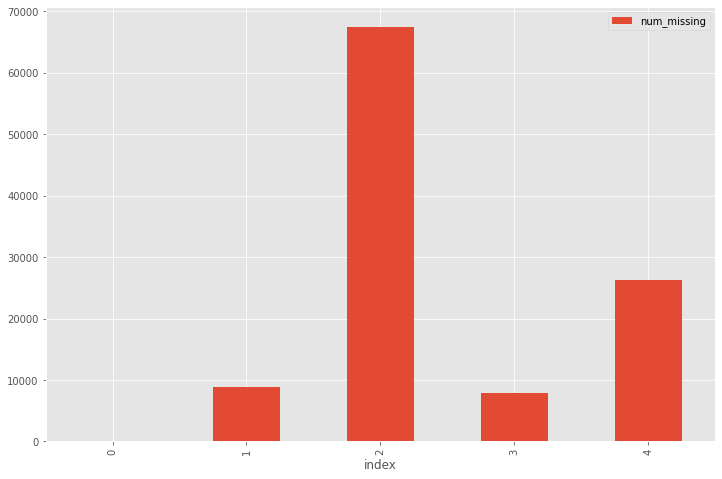

In [ ]:
# отбрасываем строки с большим количеством пропусков
ind_missing = df[df['num_missing'] > 4].index
df = df.drop(ind_missing, axis=0)

for col in df.columns:
    missing = df[col].isnull()
    num_missing = np.sum(missing)
    
    if num_missing > 0:  
        print('created missing indicator for: {}'.format(col))
        df['{}_ismissing'.format(col)] = missing

ismissing_cols = [col for col in df.columns if 'ismissing' in col]
df['num_missing'] = df[ismissing_cols].sum(axis=1)

df['num_missing'].value_counts().reset_index().sort_values(by='index').plot.bar(x='index', y='num_missing')

Признаки DiscontinuedDate - 89%
ChemicalDateRemoved - 97% имеют высокий процент недостающих значений. Можем полностью отказаться от этих признаков.

In [ ]:
cols_to_drop = ['DiscontinuedDate', 'ChemicalDateRemoved']
df = df.drop(cols_to_drop, axis=1)

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

CDPHId - 0%
ProductName - 0%
CSFId - 28%
CSF - 29%
CompanyId - 0%
CompanyName - 0%
BrandName - 0%
PrimaryCategoryId - 0%
PrimaryCategory - 0%
SubCategoryId - 0%
SubCategory - 0%
CasId - 0%
CasNumber - 4%
ChemicalId - 0%
ChemicalName - 0%
InitialDateReported - 0%
MostRecentDateReported - 0%
ChemicalCreatedAt - 0%
ChemicalUpdatedAt - 0%
ChemicalCount - 0%
CSFId_ismissing - 0%
CSF_ismissing - 0%
BrandName_ismissing - 0%
CasNumber_ismissing - 0%
DiscontinuedDate_ismissing - 0%
ChemicalDateRemoved_ismissing - 0%
num_missing - 0%


Для численных признаков можно воспользоваться методом принудительного заполнения пропусков. На место пропуска можно записать среднее или медианное значение, полученное из остальных записей.

In [ ]:
# impute the missing values and create the missing value indicator variables for each numeric column.
data_numeric = df.select_dtypes(include=[np.number])
numeric_cols = data_numeric.columns.values

for col in numeric_cols:
    missing = df[col].isnull()
    num_missing = np.sum(missing)
    
    if num_missing > 0:  # only do the imputation for the columns that have missing values.
        print('imputing missing values for: {}'.format(col))
        df['{}_ismissing'.format(col)] = missing
        med = df[col].median()
        df[col] = df[col].fillna(med)

imputing missing values for: CSFId


Для категориальных признаков можно использовать в качестве заполнителя наиболее часто встречающееся значение.

In [ ]:
data_non_numeric = df.select_dtypes(exclude=[np.number])
non_numeric_cols = data_non_numeric.columns.values

for col in non_numeric_cols:
    missing = df[col].isnull()
    num_missing = np.sum(missing)
    
    if num_missing > 0:  # only do the imputation for the columns that have missing values.
        print('imputing missing values for: {}'.format(col))
        data_non_numeric['{}_ismissing'.format(col)] = missing
        
        top = df[col].describe()['top'] # impute with the most frequent value.
        df[col] = df[col].fillna(top)

imputing missing values for: CSF
imputing missing values for: BrandName
imputing missing values for: CasNumber


In [ ]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

CDPHId - 0%
ProductName - 0%
CSFId - 0%
CSF - 0%
CompanyId - 0%
CompanyName - 0%
BrandName - 0%
PrimaryCategoryId - 0%
PrimaryCategory - 0%
SubCategoryId - 0%
SubCategory - 0%
CasId - 0%
CasNumber - 0%
ChemicalId - 0%
ChemicalName - 0%
InitialDateReported - 0%
MostRecentDateReported - 0%
ChemicalCreatedAt - 0%
ChemicalUpdatedAt - 0%
ChemicalCount - 0%
CSFId_ismissing - 0%
CSF_ismissing - 0%
BrandName_ismissing - 0%
CasNumber_ismissing - 0%
DiscontinuedDate_ismissing - 0%
ChemicalDateRemoved_ismissing - 0%
num_missing - 0%


Из процентного соотношения видно, что мы избавились от всех пропущенных значений.

Более наглядно это можно увидеть, сравнив получившуюся таблицу с первоначальной.

In [ ]:
df_before = pd.read_csv('/content/sample_data/chemicals-in-cosmetics.csv') 
df_before.head()

,CDPHId,ProductName,CSFId,CSF,CompanyId,CompanyName,BrandName,PrimaryCategoryId,PrimaryCategory,SubCategoryId,...,CasNumber,ChemicalId,ChemicalName,InitialDateReported,MostRecentDateReported,DiscontinuedDate,ChemicalCreatedAt,ChemicalUpdatedAt,ChemicalDateRemoved,ChemicalCount
0,2,ULTRA COLOR RICH EXTRA PLUMP LIPSTICK-ALL SHADES,NaN,NaN,4,New Avon LLC,AVON,44,Makeup Products (non-permanent),53,...,13463-67-7,6,Titanium dioxide,06/17/2009,08/28/2013,02/01/2011,07/09/2009,07/09/2009,NaN,1
1,3,Glover's Medicated Shampoo,NaN,NaN,338,J. Strickland & Co.,Glover's,18,Hair Care Products (non-coloring),25,...,65996-92-1,4,Distillates (coal tar),07/01/2009,07/01/2009,NaN,07/01/2009,07/01/2009,NaN,2
2,3,Glover's Medicated Shampoo,NaN,NaN,338,J. Strickland & Co.,Glover's,18,Hair Care Products (non-coloring),25,...,140-67-0,5,Estragole,07/01/2009,07/01/2009,NaN,07/02/2009,07/02/2009,NaN,2
3,4,PRECISION GLIMMER EYE LINER-ALL SHADES �,NaN,NaN,4,New Avon LLC,AVON,44,Makeup Products (non-permanent),46,...,13463-67-7,7,Titanium dioxide,07/09/2009,08/28/2013,NaN,07/09/2009,07/09/2009,NaN,1
4,5,AVON BRILLIANT SHINE LIP GLOSS-ALL SHADES �,NaN,NaN,4,New Avon LLC,AVON,44,Makeup Products (non-permanent),52,...,13463-67-7,8,Titanium dioxide,07/09/2009,08/28/2013,02/01/2011,07/09/2009,07/09/2009,NaN,1


In [ ]:
df.head()

,CDPHId,ProductName,CSFId,CSF,CompanyId,CompanyName,BrandName,PrimaryCategoryId,PrimaryCategory,SubCategoryId,...,ChemicalCreatedAt,ChemicalUpdatedAt,ChemicalCount,CSFId_ismissing,CSF_ismissing,BrandName_ismissing,CasNumber_ismissing,DiscontinuedDate_ismissing,ChemicalDateRemoved_ismissing,num_missing
0,2,ULTRA COLOR RICH EXTRA PLUMP LIPSTICK-ALL SHADES,31885.0,Black,4,New Avon LLC,AVON,44,Makeup Products (non-permanent),53,...,07/09/2009,07/09/2009,1,True,True,False,False,False,True,3
1,3,Glover's Medicated Shampoo,31885.0,Black,338,J. Strickland & Co.,Glover's,18,Hair Care Products (non-coloring),25,...,07/01/2009,07/01/2009,2,True,True,False,False,True,True,4
2,3,Glover's Medicated Shampoo,31885.0,Black,338,J. Strickland & Co.,Glover's,18,Hair Care Products (non-coloring),25,...,07/02/2009,07/02/2009,2,True,True,False,False,True,True,4
3,4,PRECISION GLIMMER EYE LINER-ALL SHADES �,31885.0,Black,4,New Avon LLC,AVON,44,Makeup Products (non-permanent),46,...,07/09/2009,07/09/2009,1,True,True,False,False,True,True,4
4,5,AVON BRILLIANT SHINE LIP GLOSS-ALL SHADES �,31885.0,Black,4,New Avon LLC,AVON,44,Makeup Products (non-permanent),52,...,07/09/2009,07/09/2009,1,True,True,False,False,False,True,3


Также можно заменить недостающие значения дефолтными, чтобы избежать потери данных.

In [ ]:
# категориальные признаки
# # df['sub_area'] = df['sub_area'].fillna('_MISSING_')

# численные признаки
# # df['life_sq'] = df['life_sq'].fillna(-999)